##### before this visit eda_queries.sql to see the complete EDA
**Finding the common words**

In [2]:
import pandas as pd
import mysql.connector
from dotenv import load_dotenv
import os
from collections import Counter
import re
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from urllib.parse import quote_plus

In [3]:
load_dotenv()

True

In [4]:
# database connection
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')

password_encoded = quote_plus(db_password)

# connecting to MySQL database
conn = mysql.connector.connect(
  host=db_host,
  user=db_user,
  password=db_password,
  database=db_name
)

In [ ]:
# creating query to get the most used words from relevant column
query = "SELECT cleaned_text FROM post_and_comment WHERE cleaned_text != '';"
df = pd.read_sql(query, conn)

conn.close()

In [6]:
# earlier in the code used 'PorterStemmer' and joined all 'cleaned_text' into one gaint string and then split them into tokens so the word count is big
# removing stopwords to reduce noise words

stop_words = set(stopwords.words('english'))

custom_stopwords = {
    'peopl', 'like', 'get', 'dont', 'go', 'one', 'use', 'us', 'make', 'would', 'even',
    'want', 'time', 'think', 'im', 'right', 'need', 'thing', 'know', 'say', 'fuck',
    'year', 'that', 'also', 'way', 'work', 'tri', 'see', 'good', 'actual', 'still',
    'much', 'cant', 'realli', 'theyr', 'well', 'never', 'take', 'doesnt', 'could',
    'look', 'mean', 'happen', 'back', 'shit', 'car', 'point', 'said'
}

all_stopwords = stop_words.union(custom_stopwords)

# combining all words
all_words = " ".join(df['cleaned_text']).split()

filtered_words = [w for w in all_words if w not in all_stopwords]

# counting frequency
word_freq = Counter(filtered_words)
print(word_freq.most_common(50))

[('trump', 5520), ('compani', 3936), ('govern', 3928), ('everi', 3232), ('reddit', 3224), ('anyth', 3216), ('free', 3208), ('new', 3208), ('come', 3200), ('china', 3144), ('game', 3128), ('alreadi', 3120), ('ai', 3112), ('media', 3080), ('didnt', 3072), ('countri', 3048), ('news', 3024), ('isnt', 3024), ('got', 3000), ('sure', 3000), ('day', 2984), ('call', 2960), ('american', 2960), ('show', 2952), ('start', 2912), ('state', 2904), ('ad', 2904), ('someth', 2896), ('first', 2896), ('let', 2864), ('lot', 2856), ('ban', 2856), ('control', 2832), ('power', 2824), ('give', 2784), ('mani', 2760), ('money', 2752), ('tiktok', 2744), ('guy', 2696), ('bad', 2688), ('buy', 2680), ('reason', 2608), ('person', 2576), ('better', 2568), ('run', 2544), ('feel', 2536), ('polit', 2512), ('vote', 2512), ('speech', 2488), ('keep', 2448)]


In [7]:
# using bigrams to get much more useful words

bigrams = ngrams(filtered_words, 2)
bigrams_freq = Counter(bigrams)

print(bigrams_freq.most_common(50))

[(('free', 'speech'), 1496), (('social', 'media'), 1096), (('charli', 'kirk'), 888), (('fox', 'news'), 848), (('cancel', 'disney'), 680), (('new', 'app'), 624), (('first', 'amend'), 616), (('jimmi', 'kimmel'), 448), (('unit', 'state'), 448), (('door', 'handl'), 448), (('read', 'articl'), 424), (('freedom', 'speech'), 392), (('video', 'game'), 392), (('cancel', 'cultur'), 376), (('epstein', 'file'), 360), (('truth', 'social'), 360), (('everi', 'singl'), 336), (('everyon', 'els'), 336), (('ive', 'seen'), 320), (('tik', 'tok'), 320), (('open', 'door'), 304), (('donald', 'trump'), 272), (('st', 'amend'), 256), (('media', 'compani'), 256), (('peter', 'thiel'), 256), (('first', 'place'), 256), (('fcc', 'chair'), 248), (('rest', 'world'), 240), (('domest', 'terror'), 240), (('disney', 'subscript'), 232), (('everi', 'day'), 232), (('suprem', 'court'), 208), (('someon', 'els'), 208), (('left', 'wing'), 200), (('anyth', 'els'), 200), (('due', 'process'), 200), (('rfk', 'jr'), 200), (('roll', 'st

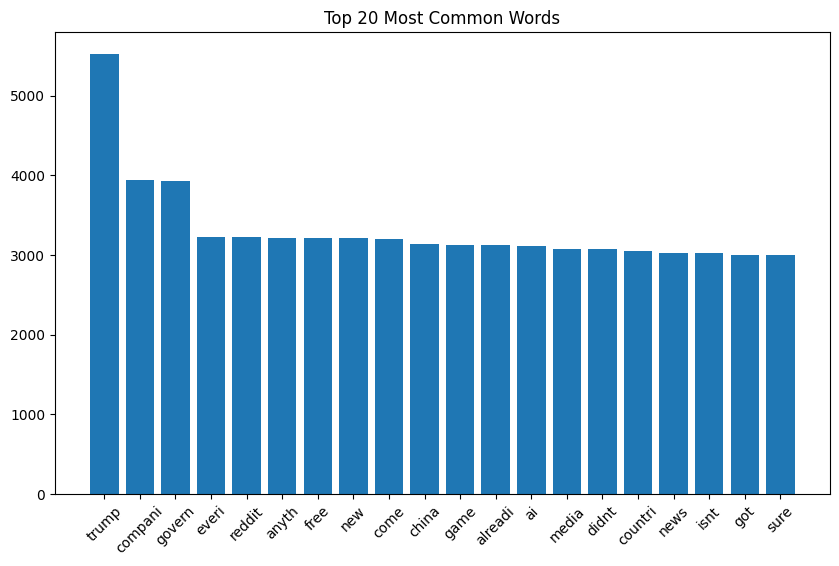

In [8]:
import matplotlib.pyplot as plt

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.show()

- **scrapped data from r/technology subreddit hot posts covers wide range of topics. Its clear based on the value counts**
- **Noticed few topics marked wrong even though there is nothing related to AI/Privacy. So refining the keywords also along with the AI, Privacy adding one more keyword is 'political' as these posts major discussion is about political view**

In [9]:
stemmer = PorterStemmer()

ai_keywords_full = {
  "ai", "artificial intelligence", "chatgpt", "gpt", "openai", "bard", "gemini", 
  "llm", "large language model", "deep learning", "machine learning", "neural network",
  "automation", "autonomous", "robot", "robotics", "training data", "generative", "stable diffusion"
}

privacy_keywords_full = {
  "privacy", "personal data", "data breach", "data leak", "data protection",
  "surveillance", "facial recognition", "cctv", "anonymity", "tracking",
  "vpn", "proxy", "encryption", "cybersecurity", "hacking", "hack",
  "identity theft", "gdpr", "cambridge analytica", "metadata"
}

political_keywords_full = {
  "trump", "biden", "president", "government", "administration", 
  "senate", "congress", "democrat", "republican", "gop", 
  "left wing", "right wing", "maga", "politics", "election", 
  "vote", "voting", "campaign", "policy", "law", "legislation", 
  "supreme court", "governor", "senator", "congressman", "politician", 
  "dictatorship", "fascism", "authoritarian", "freedom of speech", 
  "first amendment", "constitution"
}

# using stem to get the accurate match
ai_keywords_stemmed = {stemmer.stem(k) for k in ai_keywords_full}
privacy_keywords_stemmed = {stemmer.stem(k) for k in privacy_keywords_full}
political_keywords_stemmed = {stemmer.stem(k) for k in political_keywords_full}

def tag_topic_stemmed(text):
  if not isinstance(text, str):
    return "Other Concern Related"
  
  text_words = set(text.lower().split())

  ai_match = not text_words.isdisjoint(ai_keywords_stemmed)
  pr_match = not text_words.isdisjoint(privacy_keywords_stemmed)
  political_match = not text_words.isdisjoint(political_keywords_stemmed)

  if ai_match and pr_match:
    return "AI and Privacy Related"
  if pr_match and political_match:
    return "Privacy and Political Related"
  if ai_match:
    return "AI Related"
  if pr_match:
    return "Privacy Related"
  if political_match:
    return "Political Related"
  
  return "Other Concern Related"

df['topic'] = df['cleaned_text'].apply(tag_topic_stemmed)

In [10]:
df[['cleaned_text', 'topic']].head(20)

,cleaned_text,topic
0,kimmel make meaning person donat kirk famili t...,Other Concern Related
1,compani never address chairman abus virginia g...,Other Concern Related
2,kneel totalitarian save skin stupid simpli mov...,Other Concern Related
3,sinclair lift suspens jimmi kimmel live statio...,Other Concern Related
4,never enough peopl appeas authoritarian polit ...,Political Related
5,well sinclair farright turd,Other Concern Related
6,note jimmi didnt say anyth disparag kirk put j...,Political Related
7,jimmi kimmel walk away sue disney remaind cont...,Other Concern Related
8,welp never watch abc regardless happen jimmi,Other Concern Related
9,guy america fuck,Other Concern Related


In [11]:
df['topic'].value_counts()

topic
Other Concern Related            86992
Political Related                17768
AI Related                        4080
Privacy Related                   1688
Privacy and Political Related      512
AI and Privacy Related             152
Name: count, dtype: int64

In [12]:
# the above method covered most of the topics but few words might be aligned with the above method so using n-grams and synonym expression along with the stemmed method to see how many words can be captured

stemmer = PorterStemmer()

# keywords
ai_keywords_full = {
    "ai", "artificial intelligence", "chatgpt", "gpt", "openai", "bard", "gemini", 
    "llm", "large language model", "deep learning", "machine learning", "ml",
    "neural network", "automation", "autonomous", "robot", "robotics", "training data", 
    "generative", "stable diffusion", "deepfake", "ai tool", "ai model"
}

privacy_keywords_full = {
    "privacy", "personal data", "data breach", "data leak", "data protection",
    "surveillance", "facial recognition", "cctv", "anonymity", "tracking",
    "vpn", "proxy", "encryption", "cybersecurity", "hacking", "hack",
    "identity theft", "gdpr", "cambridge analytica", "metadata",
    "cyberattack", "privacy law"
}

political_keywords_full = {
    "trump", "biden", "president", "government", "administration", 
    "senate", "senator", "congress", "congressman", "democrat", "republican", "gop", 
    "left wing", "right wing", "maga", "politics", "election", 
    "vote", "voting", "campaign", "policy", "law", "legislation", 
    "supreme court", "governor", "politician", 
    "dictatorship", "fascism", "authoritarian", "freedom of speech", 
    "first amendment", "constitution"
}

# converting to lowercase, tokenize, stem and generating n-grams
def preprocess_stem(text):
  if not isinstance(text, str):
    return set()
  
  words = text.lower().split()
  stems = [stemmer.stem(w) for w in words]

  # adding bigrams and trigrams phrase detection
  for n in [2, 3]:
    grams = ngrams(words, n)
    stems.extend([" ".join(g) for g in grams])

  return set(stems)

# applying stemming and keeping multiword pharses
def stem_keywords(keywords):
  stemmed = set()
  for k in keywords:
    if " " in k:
      stemmed.add(k.lower())
    else:
      stemmed.add(stemmer.stem(k.lower()))

  return stemmed

ai_keywords_stemmed = stem_keywords(ai_keywords_full)
privacy_keywords_stemmed = stem_keywords(privacy_keywords_full)
political_keywords_stemmed = stem_keywords(political_keywords_full)

def tag_topic_new_stemmed(text):
  tokens = preprocess_stem(text)

  ai_match = not tokens.isdisjoint(ai_keywords_stemmed)
  pr_match = not tokens.isdisjoint(privacy_keywords_stemmed)
  political_match = not tokens.isdisjoint(political_keywords_stemmed)

  if ai_match and pr_match:
    return "AI and Privacy Related"
  if pr_match and political_match:
    return "Privacy and Political Related"
  if ai_match:
    return "AI Related"
  if pr_match:
    return "Privacy Related"
  if political_match:
    return "Political Related"
  return "Other Concern Related"

df['topic'] = df['cleaned_text'].apply(tag_topic_new_stemmed)

In [13]:
df['topic'].value_counts()

topic
Other Concern Related            86336
Political Related                18408
AI Related                        4088
Privacy Related                   1680
Privacy and Political Related      528
AI and Privacy Related             152
Name: count, dtype: int64

**after adding the n-grams and synonyms there are some small changes like `Political Related` went up and there is a slight decrease in the `Other Concern Related` so keeping this new approach as final**

In [14]:
# verifying the tags
def explain_tagging(text):
  tokens = preprocess_stem(text)
  matches = {
    "AI": tokens.intersection(ai_keywords_stemmed),
    "Privacy": tokens.intersection(privacy_keywords_stemmed),
    "Political": tokens.intersection(political_keywords_stemmed)
  }
  return matches

for i, row in df.sample(10, random_state = 42).iterrows():
  print("TEXT:", row['cleaned_text'][:150])
  print("TOPIC:", row['topic'])
  print("MATCHES:", explain_tagging(row['cleaned_text']))
  print(" "*60)

TEXT: actual one foundat pillar us
TOPIC: Other Concern Related
MATCHES: {'AI': set(), 'Privacy': set(), 'Political': set()}
                                                            
TEXT: mayb think trump antichrist here websit list way align
TOPIC: Political Related
MATCHES: {'AI': set(), 'Privacy': set(), 'Political': {'trump'}}
                                                            
TEXT: oracl protrumpproconserv corpor go would consid align actual govern offici get board seat larri ellison founderchairman donat million rep campaign hel
TOPIC: Political Related
MATCHES: {'AI': set(), 'Privacy': set(), 'Political': {'trump', 'campaign', 'elect', 'govern'}}
                                                            
TEXT: sinclair want admin approv
TOPIC: Other Concern Related
MATCHES: {'AI': set(), 'Privacy': set(), 'Political': set()}
                                                            
TEXT: funni look top post conserv subreddit major top post hand peopl sub milli

In [15]:
# saving the dataframe to use this in the next step for sentiment analysis
df.to_csv('../data/processed_reddit_data.csv', index = False)